In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Data

In [3]:
import pandas as pd

# Load your dataset (replace 'diabetes.csv' with your file path)
df = pd.read_csv('Diabetes_Final_Data_V2.csv')

# Display first 5 rows
print("First 5 rows:")
print(df.head())

# Dataset shape (rows, columns)
print(f"\nShape: {df.shape}")

# Column names and data types
print("\nData types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
   age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42  Female          66          110            73     5.88    1.65   
1   35  Female          60          125            68     5.71    1.47   
2   62  Female          57          127            74     6.85    1.52   
3   73    Male          55          193           112     6.28    1.63   
4   68  Female          71          150            81     5.71    1.42   

   weight    bmi  family_diabetes  hypertensive  family_hypertension  \
0    70.2  25.75                0             0                    0   
1    42.5  19.58                0             0                    0   
2    47.0  20.24                0             0                    0   
3    57.4  21.72                0             0                    0   
4    36.0  17.79                0             0                    0   

   cardiovascular_disease  stroke diabetic  
0                       0       0       No  
1                 

In [4]:
# Check for physiologically impossible zeros
print(df[['glucose', 'systolic_bp', 'diastolic_bp']].min())

glucose          0.0
systolic_bp     62.0
diastolic_bp    45.0
dtype: float64


In [5]:
# Basic statistics for numerical features
print("\nSummary statistics:")
print(df.describe())

# For categorical variables (if any):
print(df['diabetic'].value_counts())


Summary statistics:
               age   pulse_rate  systolic_bp  diastolic_bp      glucose  \
count  5437.000000  5437.000000  5437.000000   5437.000000  5437.000000   
mean     45.533750    76.768990   133.859849     82.064742     7.540682   
std      14.321155    12.290076    22.293015     12.489593     2.923080   
min       8.000000     5.000000    62.000000     45.000000     0.000000   
25%      35.000000    69.000000   119.000000     73.000000     6.000000   
50%      45.000000    76.000000   130.000000     81.000000     6.920000   
75%      55.000000    84.000000   147.000000     90.000000     8.120000   
max     112.000000   133.000000   231.000000    119.000000    33.460000   

            height       weight          bmi  family_diabetes  hypertensive  \
count  5437.000000  5437.000000  5437.000000      5437.000000   5437.000000   
mean      1.548571    53.626816    22.472301         0.037337      0.109803   
std       0.080955    10.091550     8.778764         0.189603     

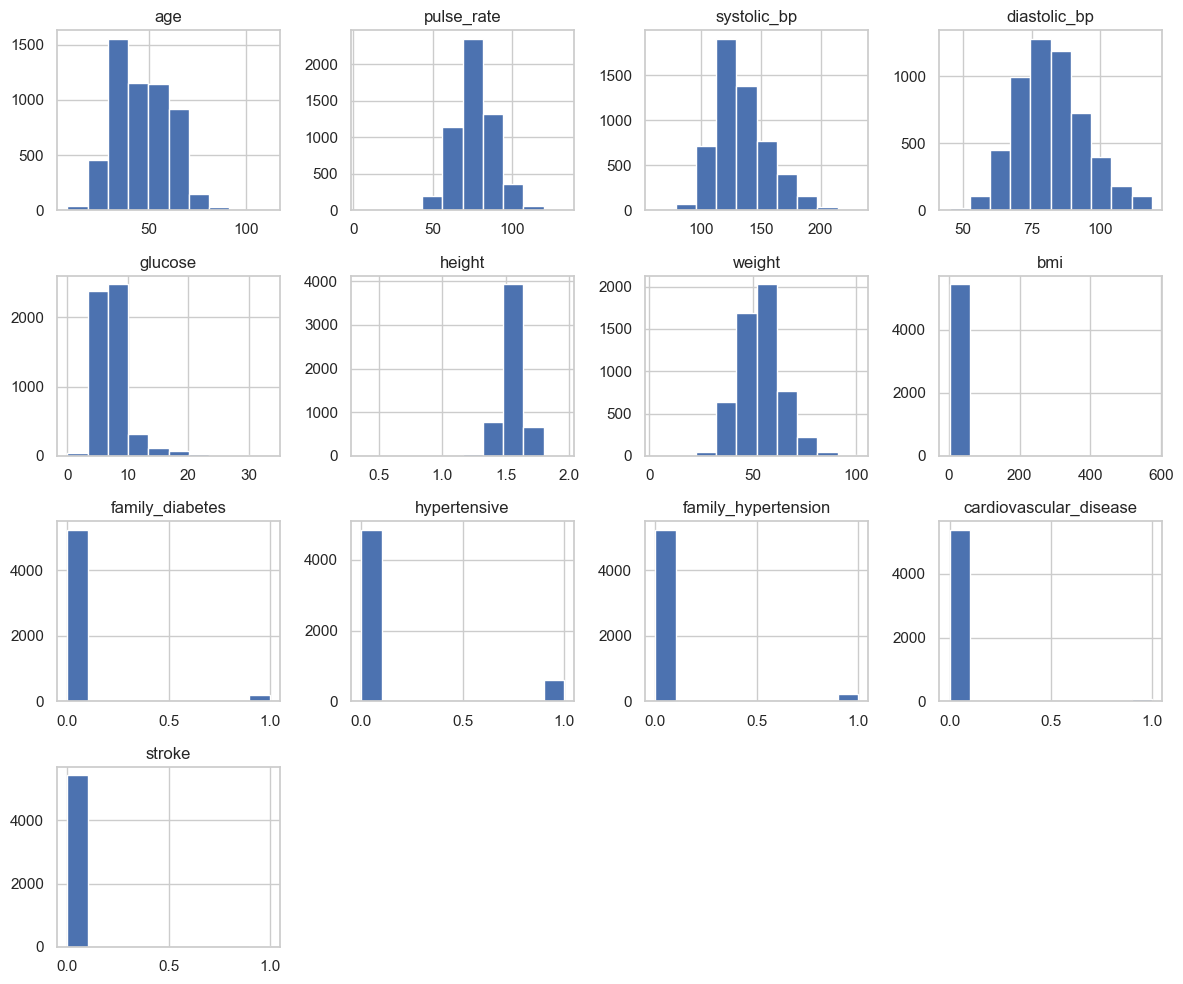

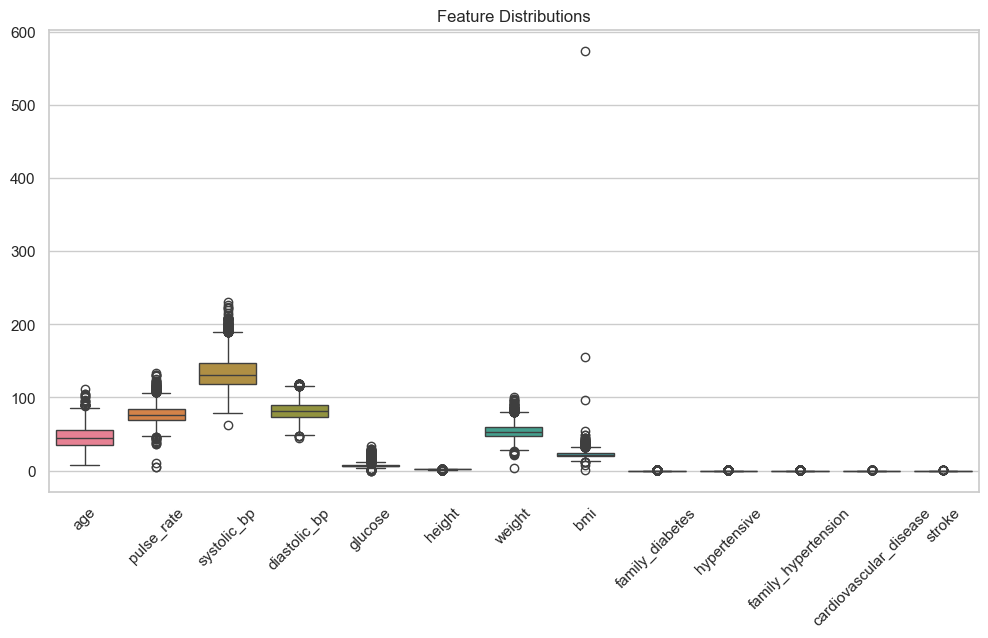

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Feature Correlation')
# plt.show()

# Boxplots to check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Feature Distributions')
plt.show()

# Pairplot for key relationships (use subset if too many features)
sns.pairplot(df, hue='diabetic')  # If 'Outcome' is your target

#check data

In [ ]:
df['diabetic'].value_counts(normalize=True)

diabetic
No     0.93673
Yes    0.06327
Name: proportion, dtype: float64

In [ ]:
# Check for physiologically impossible zeros
print(df[['glucose', 'systolic_bp', 'diastolic_bp']].min())

glucose          0.0
systolic_bp     62.0
diastolic_bp    45.0
dtype: float64


In [ ]:
# Verify BMI = weight / height²
(df['weight'] / (df['height']**2)).round(2).equals(df['bmi'].round(2))

False

In [ ]:
#Feature Distributions (Example Quick Checks):
df[['age', 'pulse_rate', 'systolic_bp', 'glucose']].describe()

,age,pulse_rate,systolic_bp,glucose
count,5437.000000,5437.000000,5437.000000,5437.000000
mean,45.533750,76.768990,133.859849,7.540682
std,14.321155,12.290076,22.293015,2.923080
min,8.000000,5.000000,62.000000,0.000000
25%,35.000000,69.000000,119.000000,6.000000
50%,45.000000,76.000000,130.000000,6.920000
75%,55.000000,84.000000,147.000000,8.120000
max,112.000000,133.000000,231.000000,33.460000


Preprocessing Steps

In [ ]:
#Encode Categorical Variables:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['diabetic'] = df['diabetic'].map({'No': 0, 'Yes': 1})

In [ ]:
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0


In [ ]:
#Feature Engineering:
# Pulse pressure (clinical indicator)
df['pulse_pressure'] = df['systolic_bp'] - df['diastolic_bp']

# Age groups
df['age_group'] = pd.cut(df['age'], bins=[0,30,45,60,100], labels=['Young','Mid','Senior','Elderly'])

Text(0.5, 1.0, 'Diabetic vs Non-Diabetic Patients')

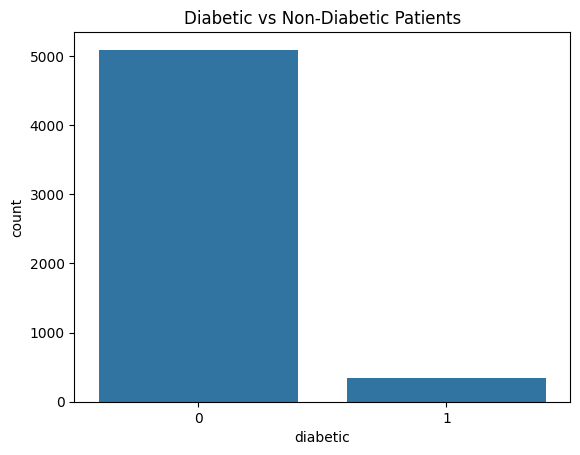

In [ ]:
sns.countplot(x='diabetic', data=df)
plt.title('Diabetic vs Non-Diabetic Patients')

<Axes: >

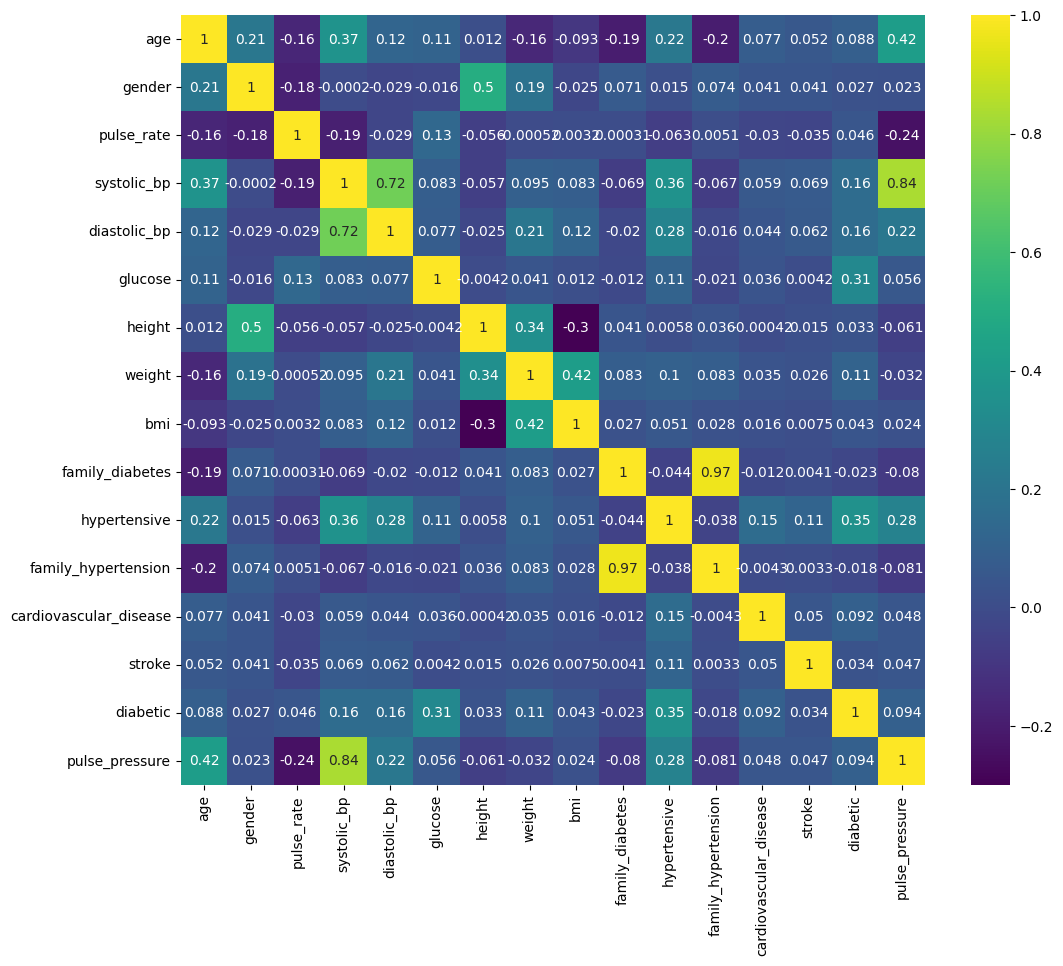

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='viridis')

Critical Visualizations to Generate

Text(0.5, 1.0, 'Blood Pressure by Diabetes Status')

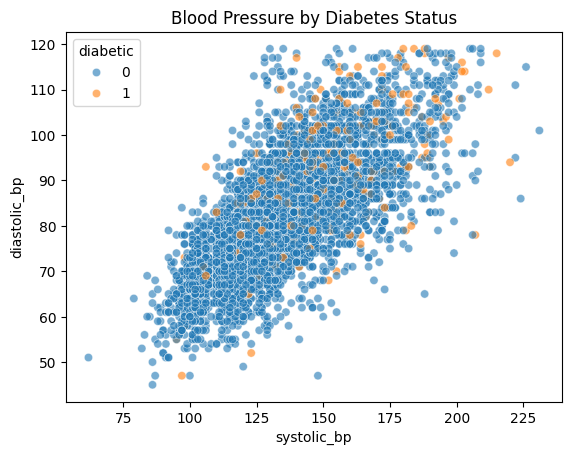

In [ ]:
sns.scatterplot(x='systolic_bp', y='diastolic_bp', 
                hue='diabetic', data=df, alpha=0.6)
plt.title('Blood Pressure by Diabetes Status')

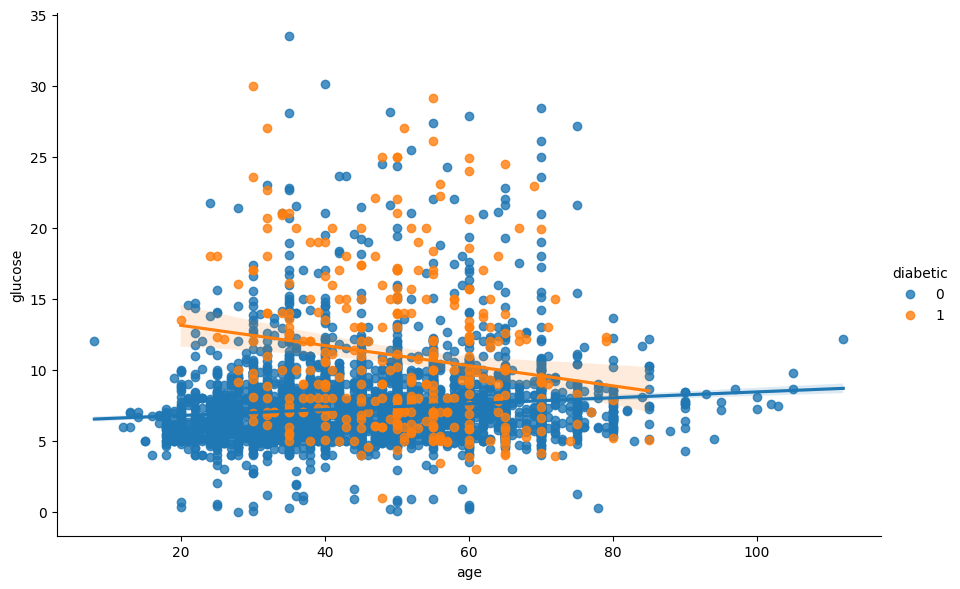

In [ ]:
sns.lmplot(x='age', y='glucose', hue='diabetic', 
           data=df, height=6, aspect=1.5)

In [ ]:
# Check for 0 values in other critical features
critical_features = ['systolic_bp', 'diastolic_bp', 'pulse_rate', 'height', 'weight']
for feature in critical_features:
    zero_count = (df[feature] == 0).sum()
    print(f"{feature} zeros: {zero_count}")

# Validate biological ranges
print("\nBiological range checks:")
print(f"Glucose range: [{df['glucose'].min()}, {df['glucose'].max()}] mmol/L")
print(f"Systolic BP range: [{df['systolic_bp'].min()}, {df['systolic_bp'].max()}] mmHg")
print(f"BMI range: [{df['bmi'].min()}, {df['bmi'].max()}]")

systolic_bp zeros: 0
diastolic_bp zeros: 0
pulse_rate zeros: 0
height zeros: 0
weight zeros: 0

Biological range checks:
Glucose range: [0.0, 33.46] mmol/L
Systolic BP range: [62, 231] mmHg
BMI range: [1.22, 574.13]


In [ ]:
# Check for 0 glucose values before removal
zero_glucose_count = (df['glucose'] == 0).sum()
print(f"Rows with 0 glucose before removal: {zero_glucose_count}")

# Remove rows where glucose is 0
df = df[df['glucose'] != 0]

# Reset index after removal
df.reset_index(drop=True, inplace=True)

# Verify removal
print(f"Rows with 0 glucose after removal: {(df['glucose'] == 0).sum()}")
print(f"New dataset shape: {df.shape}")

Rows with 0 glucose before removal: 1
Rows with 0 glucose after removal: 0
New dataset shape: (5436, 17)


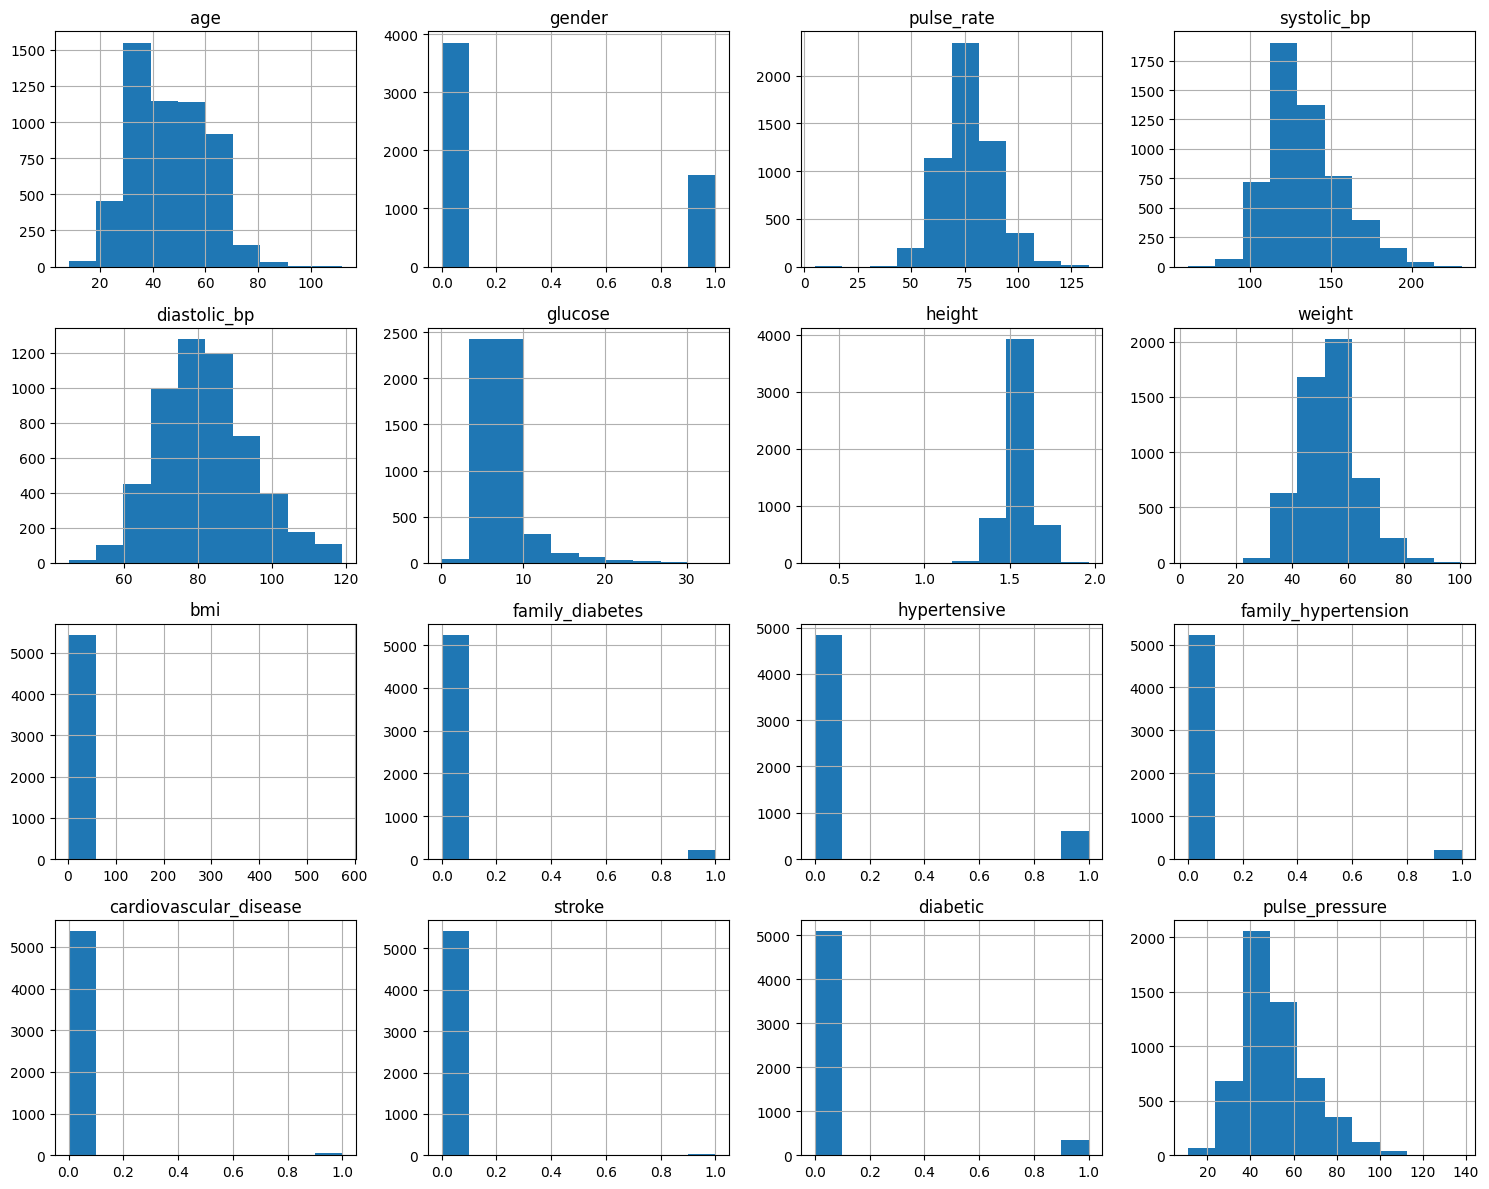

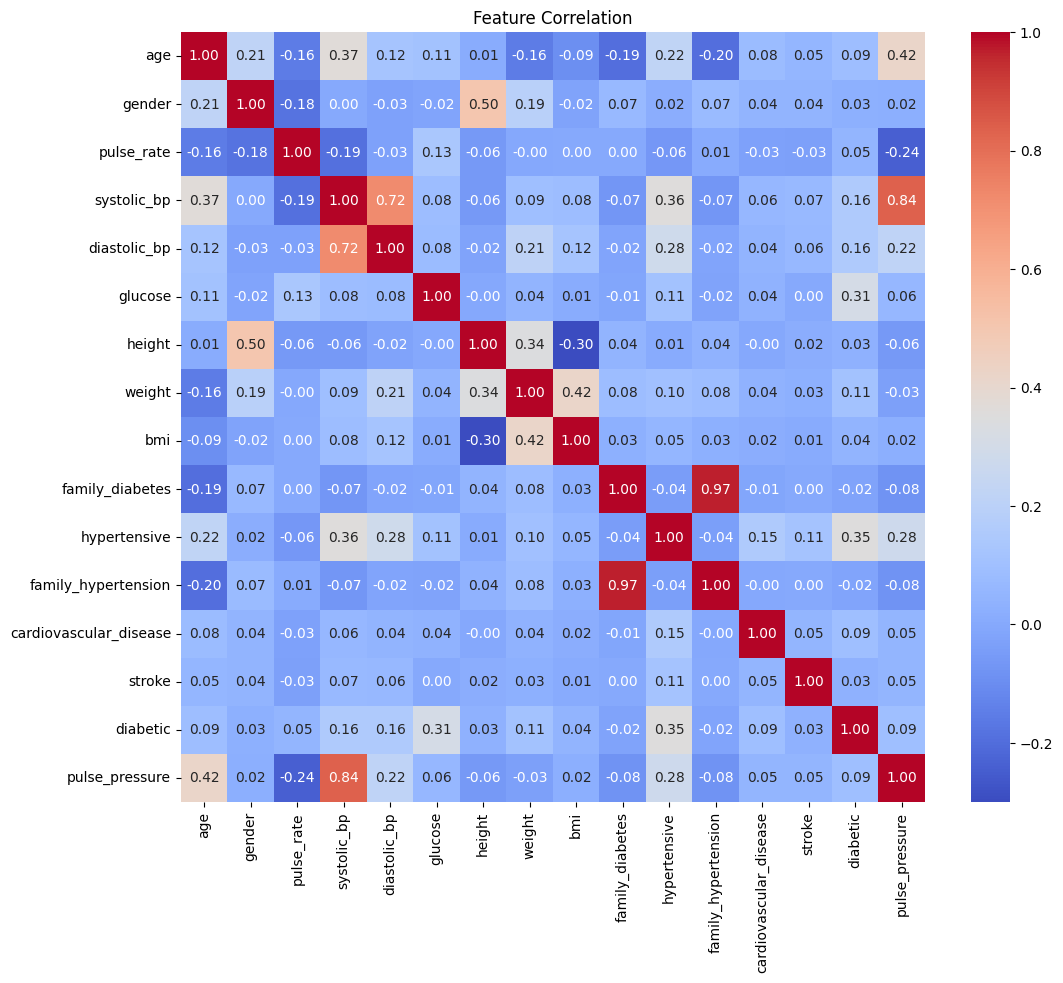

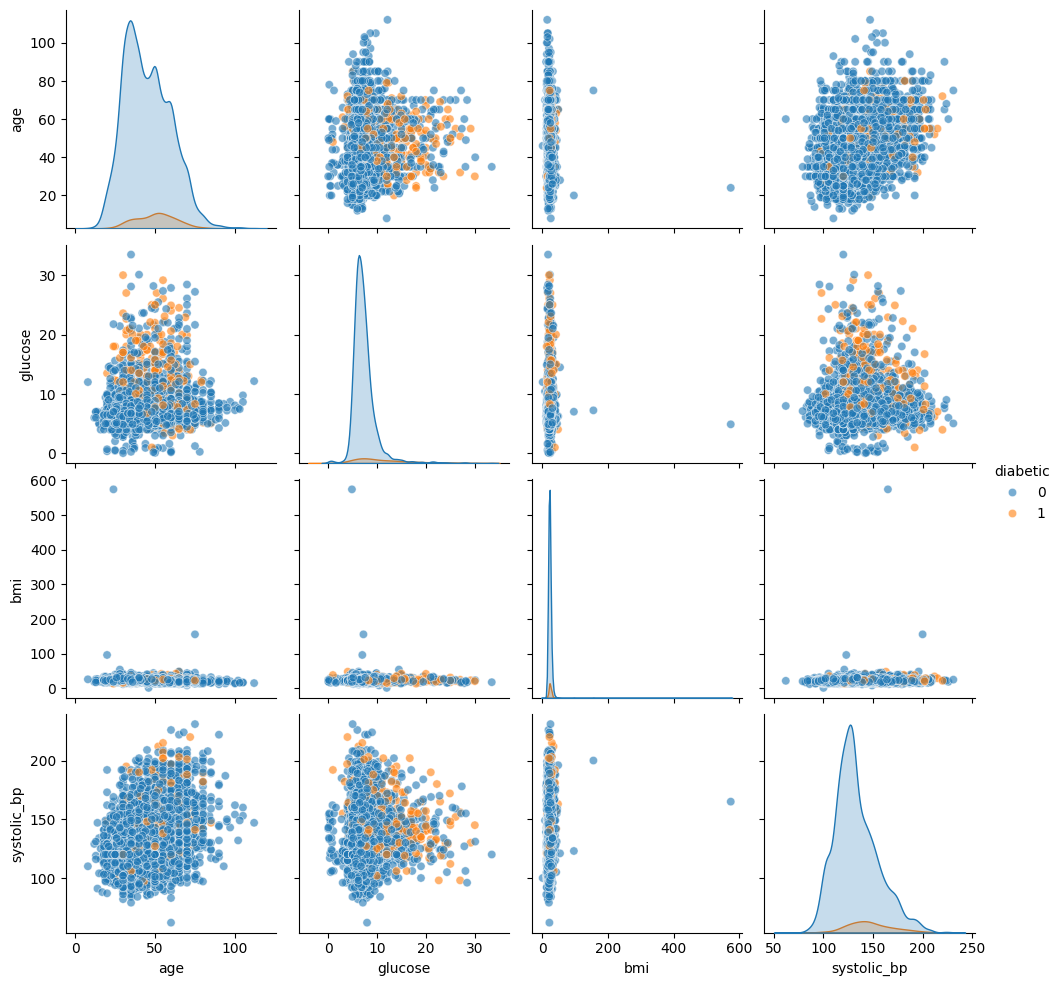

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution plots
df.hist(figsize=(15, 12))
plt.tight_layout()
plt.show()

# 2. Correlation heatmap (safe version)
plt.figure(figsize=(12, 10))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# 3. Pairplot for key features
sns.pairplot(df[['age', 'glucose', 'bmi', 'systolic_bp', 'diabetic']], 
             hue='diabetic', 
             plot_kws={'alpha': 0.6})
plt.show()

In [ ]:
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic,pulse_pressure,age_group
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0,37,Mid
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0,57,Mid
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0,53,Elderly
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0,81,Elderly
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0,69,Elderly


Verify Class Distribution

In [ ]:
print(df['diabetic'].value_counts(normalize=True))

diabetic
0    0.936718
1    0.063282
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTENC

# Identify categorical features (by column index)
categorical_features = [1, 9, 10, 11, 12, 13, 15]  # Updated indices  # Positions of: gender, family_diabetes, etc.

# Initialize SMOTENC
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    sampling_strategy='auto',  # Balances to 50/50
    random_state=42,
    k_neighbors=5
)

# Separate features and target
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Apply resampling
X_res, y_res = smote_nc.fit_resample(X, y)

# Verify new balance
print("\nBalanced class distribution:")
print(y_res.value_counts(normalize=True))


Balanced class distribution:
diabetic
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
balanced_df = pd.concat([X_res, y_res], axis=1)
balanced_df['age_group'] = balanced_df['age_group'].astype('category')  # Restore categorical type

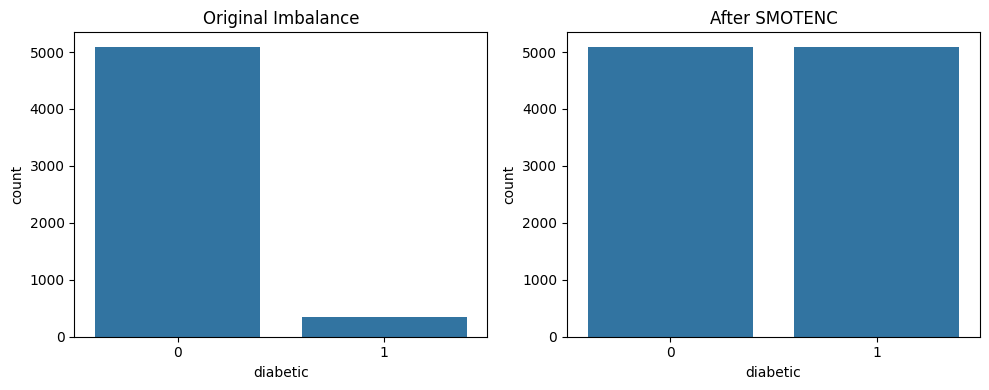

In [ ]:
# Before balancing
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x='diabetic', data=df)
plt.title('Original Imbalance')

# After balancing
plt.subplot(1, 2, 2)
sns.countplot(x='diabetic', data=balanced_df)
plt.title('After SMOTENC')
plt.tight_layout()
plt.show()



Why SMOTENC?

    Handles mixed data types (numerical + categorical)

    Generates synthetic samples for minority class

    Maintains feature relationships

    Better than random oversampling (reduces overfitting)

In [ ]:
# Confirm your categorical columns
cat_cols = X.columns[categorical_features].tolist()
print("Categorical features handled:", cat_cols)
# Should output: ['gender', 'family_diabetes', 'hypertensive', 
#                'family_hypertension', 'cardiovascular_disease', 
#                'stroke', 'age_group']

Categorical features handled: ['gender', 'family_diabetes', 'hypertensive', 'family_hypertension', 'cardiovascular_disease', 'stroke', 'age_group']


In [ ]:
balanced_df = pd.concat([pd.DataFrame(X_res), pd.Series(y_res, name='diabetic')], axis=1)
print("\nBalanced data sample:")
print(balanced_df.head())


Balanced data sample:
   age  gender  pulse_rate  systolic_bp  diastolic_bp  glucose  height  \
0   42       0          66          110            73     5.88    1.65   
1   35       0          60          125            68     5.71    1.47   
2   62       0          57          127            74     6.85    1.52   
3   73       1          55          193           112     6.28    1.63   
4   68       0          71          150            81     5.71    1.42   

   weight    bmi  family_diabetes  hypertensive  family_hypertension  \
0    70.2  25.75                0             0                    0   
1    42.5  19.58                0             0                    0   
2    47.0  20.24                0             0                    0   
3    57.4  21.72                0             0                    0   
4    36.0  17.79                0             0                    0   

   cardiovascular_disease  stroke  pulse_pressure age_group  diabetic  
0                       0  

In [ ]:
balanced_df.describe()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,pulse_pressure,diabetic
count,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000,10184.000000
mean,47.618126,0.279654,77.419973,140.119894,85.403574,9.064565,1.555572,55.553260,23.053213,0.019933,0.325412,0.021112,0.006186,0.001964,54.499804,0.500000
std,13.127705,0.448851,12.184362,22.944751,12.481664,4.072697,0.080024,9.745960,6.931647,0.139778,0.468552,0.143763,0.078412,0.044274,16.277569,0.500025
min,8.000000,0.000000,5.000000,62.000000,45.000000,0.040000,0.360000,3.000000,1.220000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,37.000000,0.000000,69.000000,124.000000,77.000000,6.330000,1.520000,49.020191,20.430000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,0.000000
50%,49.000000,0.000000,77.000000,137.000000,85.000000,7.733631,1.550000,55.000000,22.488801,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.500000
75%,57.000000,1.000000,85.000000,153.000000,93.000000,10.487435,1.600000,61.872653,25.104254,0.000000,1.000000,0.000000,0.000000,0.000000,63.000000,1.000000
max,112.000000,1.000000,133.000000,231.000000,119.000000,33.460000,1.960000,100.700000,574.130000,1.000000,1.000000,1.000000,1.000000,1.000000,138.000000,1.000000


In [ ]:
# Separate features (X) and target (y)
X = balanced_df.drop('diabetic', axis=1)
y = balanced_df['diabetic']

# Define numerical and categorical features explicitly based on your input
# These are the ones that should be One-Hot Encoded
categorical_features = ['gender', 'family_diabetes', 'hypertensive', 'family_hypertension',
                        'cardiovascular_disease', 'stroke', 'age_group']

# The remaining features will be treated as numerical and scaled
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create a preprocessor using ColumnTransformer
# Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep any other columns not specified (shouldn't be any in this setup)
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Using stratify=y ensures that the proportion of 'diabetic' in train and test sets is similar.

# --- Model Training and Evaluation ---

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
}

results = {}

print("--- Training and Evaluating Models ---")

for name, model in models.items():
    print(f"\nTraining {name}...")
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(pipeline, 'predict_proba') else None

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        'Confusion Matrix': cm
    }
    print(f"{name} Results:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}" if y_proba is not None else "  ROC AUC: N/A")
    print(f"  Confusion Matrix:\n{cm}")

# --- Neural Network (Simple 2-Layer) ---
print("\n--- Training Simple 2-Layer Neural Network ---")

# For the Neural Network, we need to apply the preprocessing manually to get the input shape
# Fit the preprocessor on the training data
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Get the number of features after preprocessing
input_shape = X_train_processed.shape[1]

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)), # First hidden layer
    Dense(32, activation='relu'),                              # Second hidden layer
    Dense(1, activation='sigmoid')                             # Output layer for binary classification
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
history = nn_model.fit(X_train_processed, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)

# Evaluate the Neural Network
y_pred_nn_proba = nn_model.predict(X_test_processed)
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn, zero_division=0)
recall_nn = recall_score(y_test, y_pred_nn, zero_division=0)
f1_nn = f1_score(y_test, y_pred_nn, zero_division=0)
roc_auc_nn = roc_auc_score(y_test, y_pred_nn_proba)
cm_nn = confusion_matrix(y_test, y_pred_nn)

results['Neural Network'] = {
    'Accuracy': accuracy_nn,
    'Precision': precision_nn,
    'Recall': recall_nn,
    'F1-Score': f1_nn,
    'ROC AUC': roc_auc_nn,
    'Confusion Matrix': cm_nn
}

print("Neural Network Results:")
print(f"  Accuracy: {accuracy_nn:.4f}")
print(f"  Precision: {precision_nn:.4f}")
print(f"  Recall: {recall_nn:.4f}")
print(f"  F1-Score: {f1_nn:.4f}")
print(f"  ROC AUC: {roc_auc_nn:.4f}")
print(f"  Confusion Matrix:\n{cm_nn}")

print("\n--- All Model Results Summary ---")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        if metric_name == 'Confusion Matrix':
            print(f"  {metric_name}:\n{value}")
        elif isinstance(value, float):
            print(f"  {metric_name}: {value:.4f}")
        else:
            print(f"  {metric_name}: {value}")

--- Training and Evaluating Models ---

Training Logistic Regression...
Logistic Regression Results:
  Accuracy: 0.8243
  Precision: 0.8445
  Recall: 0.7947
  F1-Score: 0.8188
  ROC AUC: 0.9056
  Confusion Matrix:
[[870 149]
 [209 809]]

Training Random Forest...
Random Forest Results:
  Accuracy: 0.9460
  Precision: 0.9391
  Recall: 0.9538
  F1-Score: 0.9464
  ROC AUC: 0.9882
  Confusion Matrix:
[[956  63]
 [ 47 971]]

Training XGBoost...
XGBoost Results:
  Accuracy: 0.9597
  Precision: 0.9553
  Recall: 0.9646
  F1-Score: 0.9599
  ROC AUC: 0.9909
  Confusion Matrix:
[[973  46]
 [ 36 982]]

Training LightGBM...
[LightGBM] [Info] Number of positive: 4074, number of negative: 4073
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1510
[LightGBM] [Info] Number of data points in the train

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as

LightGBM Results:
  Accuracy: 0.9524
  Precision: 0.9564
  Recall: 0.9479
  F1-Score: 0.9521
  ROC AUC: 0.9889
  Confusion Matrix:
[[975  44]
 [ 53 965]]

--- Training Simple 2-Layer Neural Network ---
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Neural Network Results:
  Accuracy: 0.9156
  Precision: 0.9107
  Recall: 0.9214
  F1-Score: 0.9160
  ROC AUC: 0.9675
  Confusion Matrix:
[[927  92]
 [ 80 938]]

--- All Model Results Summary ---

Logistic Regression:
  Accuracy: 0.8243
  Precision: 0.8445
  Recall: 0.7947
  F1-Score: 0.8188
  ROC AUC: 0.9056
  Confusion Matrix:
[[870 149]
 [209 809]]

Random Forest:
  Accuracy: 0.9460
  Precision: 0.9391
  Recall: 0.9538
  F1-Score: 0.9464
  ROC AUC: 0.9882
  Confusion Matrix:
[[956  63]
 [ 47 971]]

XGBoost:
  Accuracy: 0.9597
  Precision: 0.9553
  Recall: 0.9646
  F1-Score: 0.9599
  ROC AUC: 0.9909
  Confusion Matrix:
[[973  46]
 [ 36 982]]

LightGBM:
  Accuracy: 0.9524
  Precision: 0.9564
  Recall: 0.9479
  F1-Score: 0.9521
  ROC AUC: 0.9889
  

In [ ]:
import joblib
import os

# Create a directory to save the models
os.makedirs("saved_models", exist_ok=True)

# Save classical ML pipelines
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X, y)  # Fit again on the full dataset if needed
    joblib.dump(pipeline, f"saved_models/{name.replace(' ', '_').lower()}_pipeline.pkl")

print("Classical ML models saved successfully.")


[LightGBM] [Info] Number of positive: 5092, number of negative: 5092
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000668 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1524
[LightGBM] [Info] Number of data points in the train set: 10184, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Classical ML models saved successfully.


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:28:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Save the Keras neural network model
nn_model.save("saved_models/neural_network_model.h5")

print("Neural network model saved successfully.")


Neural network model saved successfully.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = {}
# Prepare data for visualization
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

# Flatten results into a DataFrame
results_df = pd.DataFrame([
    {
        'Model': model,
        'Metric': metric,
        'Score': score
    }
    for model, metrics_dict in results.items()
    for metric, score in metrics_dict.items()
    if metric in metrics_to_plot
])
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(data=results_df, x='Metric', y='Score', hue='Model')

# Customize the plot
plt.title('Model Evaluation Metrics Comparison')
plt.ylim(0, 1.05)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Metric` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>